In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# df.columns = ['TimeElapsed','time','territoryName','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes',
#               'blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes',
#               'pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters',
#               'Party','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates']
df = pd.read_csv("ElectionData.csv",
                             #names=columns,
                             sep=r'\s*,\s*',
                             na_values="?",
                             engine='python',
                             header=0) # header=0表示資料本身已包含header，不用再多一列顯示
                                       # header=None表示資料本身並沒有包含header，需自行加入columns(如上面)
# 轉日期時間格式
df['"time"'] = pd.to_datetime(df['"time"'])
print(df['"time"'])
df = df.drop(columns=['"TimeElapsed"'])
df = df.drop(columns=['"time"'])

df.head()

0       2019-10-06 20:10:02
1       2019-10-06 20:10:02
2       2019-10-06 20:10:02
3       2019-10-06 20:10:02
4       2019-10-06 20:10:02
                ...        
21638   2019-10-07 00:35:01
21639   2019-10-07 00:35:01
21640   2019-10-07 00:35:01
21641   2019-10-07 00:35:01
21642   2019-10-07 00:35:01
Name: "time", Length: 21643, dtype: datetime64[ns]


"territoryName"  "totalMandates"  "availableMandates"  "numParishes"  \
0  "Território Nacional"                0                  226           3092   
1  "Território Nacional"                0                  226           3092   
2  "Território Nacional"                0                  226           3092   
3  "Território Nacional"                0                  226           3092   
4  "Território Nacional"                0                  226           3092   

   "numParishesApproved"  "blankVotes"  "blankVotesPercentage"  "nullVotes"  \
0                   1081          9652                     2.5         8874   
1                   1081          9652                     2.5         8874   
2                   1081          9652                     2.5         8874   
3                   1081          9652                     2.5         8874   
4                   1081          9652                     2.5         8874   

   "nullVotesPercentage"  "votersPercentage"  ...  "pre.votersPercentage"  \
0                    2.3               51.36  ...                   52.66   
1                    2.3               51.36  ...                   52.66   
2                    2.3               51.36  ...                   52.66   
3                    2.3               51.36  ...                   52.66   
4                    2.3               51.36  ...                   52.66   

   "pre.subscribedVoters"  "pre.totalVoters"    "Party"  "Mandates"  \
0                  813743             428546       "PS"           0   
1                  813743             428546  "PPD/PSD"           0   
2                  813743             428546     "B.E."           0   
3                  813743             428546   "CDS-PP"           0   
4                  813743             428546  "PCP-PEV"           0   

   "Percentage"  "validVotesPercentage"  "Votes"  "Hondt" "FinalMandates"  
0         38.29                   40.22   147993       94             106  
1         33.28                   34.95   128624       81              77  
2          6.81                    7.15    26307       16              19  
3          4.90                    5.14    18923       12               5  
4          4.59                    4.83    17757       11              12  

[5 rows x 26 columns]

In [136]:
# 檢查空值
null_sum = df.isnull().sum()
print(null_sum)

"territoryName"               0
"totalMandates"               0
"availableMandates"           0
"numParishes"                 0
"numParishesApproved"         0
"blankVotes"                  0
"blankVotesPercentage"        0
"nullVotes"                   0
"nullVotesPercentage"         0
"votersPercentage"            0
"subscribedVoters"            0
"totalVoters"                 0
"pre.blankVotes"              0
"pre.blankVotesPercentage"    0
"pre.nullVotes"               0
"pre.nullVotesPercentage"     0
"pre.votersPercentage"        0
"pre.subscribedVoters"        0
"pre.totalVoters"             0
"Party"                       0
"Mandates"                    0
"Percentage"                  0
"validVotesPercentage"        0
"Votes"                       0
"Hondt"                       0
"FinalMandates"               0
dtype: int64


In [137]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()


dims=pd.get_dummies(df['"territoryName"'])
df=df.drop(columns=['"territoryName"'],axis=1)


dims_2=pd.get_dummies(df['"Party"'])
df=df.drop(columns=['"Party"'],axis=1)


res = pd.concat([dims,dims_2,df], axis=1)
res

"Aveiro"  "Açores"  "Beja"  "Braga"  "Bragança"  "Castelo Branco"  \
0             0         0       0        0           0                 0   
1             0         0       0        0           0                 0   
2             0         0       0        0           0                 0   
3             0         0       0        0           0                 0   
4             0         0       0        0           0                 0   
...         ...       ...     ...      ...         ...               ...   
21638         0         0       0        0           0                 0   
21639         0         0       0        0           0                 0   
21640         0         0       0        0           0                 0   
21641         0         0       0        0           0                 0   
21642         0         0       0        0           0                 0   

       "Coimbra"  "Faro"  "Guarda"  "Leiria"  ...  "pre.nullVotesPercentage"  \
0              0       0         0         0  ...                       1.91   
1              0       0         0         0  ...                       1.91   
2              0       0         0         0  ...                       1.91   
3              0       0         0         0  ...                       1.91   
4              0       0         0         0  ...                       1.91   
...          ...     ...       ...       ...  ...                        ...   
21638          0       0         0         0  ...                       1.90   
21639          0       0         0         0  ...                       1.90   
21640          0       0         0         0  ...                       1.90   
21641          0       0         0         0  ...                       1.90   
21642          0       0         0         0  ...                       1.90   

       "pre.votersPercentage"  "pre.subscribedVoters"  "pre.totalVoters"  \
0                       52.66                  813743             428546   
1                       52.66                  813743             428546   
2                       52.66                  813743             428546   
3                       52.66                  813743             428546   
4                       52.66                  813743             428546   
...                       ...                     ...                ...   
21638                   51.28                  371931             190712   
21639                   51.28                  371931             190712   
21640                   51.28                  371931             190712   
21641                   51.28                  371931             190712   
21642                   51.28                  371931             190712   

       "Mandates"  "Percentage"  "validVotesPercentage"  "Votes"  "Hondt"  \
0               0         38.29                   40.22   147993       94   
1               0         33.28                   34.95   128624       81   
2               0          6.81                    7.15    26307       16   
3               0          4.90                    5.14    18923       12   
4               0          4.59                    4.83    17757       11   
...           ...           ...                     ...      ...      ...   
21638           0          0.19                    0.20      332        0   
21639           0          0.18                    0.19      326        0   
21640           0          0.14                    0.15      256        0   
21641           0          0.13                    0.14      239        0   
21642           0          0.07                    0.07      118        0   

       "FinalMandates"  
0                  106  
1                   77  
2                   19  
3                    5  
4                   12  
...                ...  
21638                0  
21639                0  
21640                0  
21641                0  
21642               

In [138]:
from sklearn.preprocessing import MinMaxScaler
#建立MinMaxScaler物件
columns = ['"totalMandates"','"availableMandates"','"numParishes"','"numParishesApproved"','"blankVotes"',
    '"blankVotesPercentage"','"nullVotes"','"nullVotesPercentage"','"votersPercentage"','"subscribedVoters"',
    '"totalVoters"','"pre.blankVotes"','"pre.blankVotesPercentage"','"pre.nullVotes"','"pre.nullVotesPercentage"',
    '"pre.votersPercentage"','"pre.subscribedVoters"','"pre.totalVoters"','"Mandates"','"Percentage"','"validVotesPercentage"',
    '"Votes"','"Hondt"']
minmax = MinMaxScaler()

res[columns] = minmax.fit_transform(res[columns])
res.head()

"Aveiro"  "Açores"  "Beja"  "Braga"  "Bragança"  "Castelo Branco"  \
0         0         0       0        0           0                 0   
1         0         0       0        0           0                 0   
2         0         0       0        0           0                 0   
3         0         0       0        0           0                 0   
4         0         0       0        0           0                 0   

   "Coimbra"  "Faro"  "Guarda"  "Leiria"  ...  "pre.nullVotesPercentage"  \
0          0       0         0         0  ...                   0.388889   
1          0       0         0         0  ...                   0.388889   
2          0       0         0         0  ...                   0.388889   
3          0       0         0         0  ...                   0.388889   
4          0       0         0         0  ...                   0.388889   

   "pre.votersPercentage"  "pre.subscribedVoters"  "pre.totalVoters"  \
0                0.543068                0.085586           0.079098   
1                0.543068                0.085586           0.079098   
2                0.543068                0.085586           0.079098   
3                0.543068                0.085586           0.079098   
4                0.543068                0.085586           0.079098   

   "Mandates"  "Percentage"  "validVotesPercentage"   "Votes"   "Hondt"  \
0         0.0      0.779589                0.782101  0.079293  1.000000   
1         0.0      0.677531                0.679572  0.068915  0.861702   
2         0.0      0.138317                0.138716  0.014094  0.170213   
3         0.0      0.099409                0.099611  0.010138  0.127660   
4         0.0      0.093094                0.093580  0.009513  0.117021   

   "FinalMandates"  
0              106  
1               77  
2               19  
3                5  
4               12  

[5 rows x 66 columns]

In [139]:
# 真實值為0 績效預測會無限大
res['"FinalMandates"']+=1
res

"Aveiro"  "Açores"  "Beja"  "Braga"  "Bragança"  "Castelo Branco"  \
0             0         0       0        0           0                 0   
1             0         0       0        0           0                 0   
2             0         0       0        0           0                 0   
3             0         0       0        0           0                 0   
4             0         0       0        0           0                 0   
...         ...       ...     ...      ...         ...               ...   
21638         0         0       0        0           0                 0   
21639         0         0       0        0           0                 0   
21640         0         0       0        0           0                 0   
21641         0         0       0        0           0                 0   
21642         0         0       0        0           0                 0   

       "Coimbra"  "Faro"  "Guarda"  "Leiria"  ...  "pre.nullVotesPercentage"  \
0              0       0         0         0  ...                   0.388889   
1              0       0         0         0  ...                   0.388889   
2              0       0         0         0  ...                   0.388889   
3              0       0         0         0  ...                   0.388889   
4              0       0         0         0  ...                   0.388889   
...          ...     ...       ...       ...  ...                        ...   
21638          0       0         0         0  ...                   0.383838   
21639          0       0         0         0  ...                   0.383838   
21640          0       0         0         0  ...                   0.383838   
21641          0       0         0         0  ...                   0.383838   
21642          0       0         0         0  ...                   0.383838   

       "pre.votersPercentage"  "pre.subscribedVoters"  "pre.totalVoters"  \
0                    0.543068                0.085586           0.079098   
1                    0.543068                0.085586           0.079098   
2                    0.543068                0.085586           0.079098   
3                    0.543068                0.085586           0.079098   
4                    0.543068                0.085586           0.079098   
...                       ...                     ...                ...   
21638                0.479503                0.038751           0.034869   
21639                0.479503                0.038751           0.034869   
21640                0.479503                0.038751           0.034869   
21641                0.479503                0.038751           0.034869   
21642                0.479503                0.038751           0.034869   

       "Mandates"  "Percentage"  "validVotesPercentage"   "Votes"   "Hondt"  \
0             0.0      0.779589                0.782101  0.079293  1.000000   
1             0.0      0.677531                0.679572  0.068915  0.861702   
2             0.0      0.138317                0.138716  0.014094  0.170213   
3             0.0      0.099409                0.099611  0.010138  0.127660   
4             0.0      0.093094                0.093580  0.009513  0.117021   
...           ...           ...                     ...       ...       ...   
21638         0.0      0.003463                0.003502  0.000177  0.000000   
21639         0.0      0.003259                0.003307  0.000174  0.000000   
21640         0.0      0.002444                0.002529  0.000137  0.000000   
21641         0.0      0.002241                0.002335  0.000128  0.000000   
21642         0.0      0.001019                0.000973  0.000063  0.000000   

       "FinalMandates"  
0                  107  
1                   78  
2                   20  
3                    6  
4                   13  
...                ...  
21638                1  
21639                1  
21640                1  
21641                

In [140]:
from sklearn.model_selection import train_test_split

# 切 data & label
X, y = res.iloc[:, :-1].values, res.iloc[:, -1].values

# 因為label一定要是int型態才能丟進去model訓練
y = y.astype('int')

# 切測試集&訓練集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 切驗證集
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)




In [83]:
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.12389381e-01,
       2.63331139e-02, 1.19779864e-02, 1.47322118e-02, 4.94929006e-01,
       1.43615819e-02, 3.38308458e-01, 8.67727082e-01, 1.16547398e-02,
       1.22125727e-02, 1.40366142e-02, 5.52447552e-01, 1.39182951e-02,
      

In [84]:
print(len(X))
print(len(X_train))
print(len(X_test))
print(len(X_val))


21643
15150
3246
3247


預測類別

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 構建 FNN 模型
model = Sequential()
model.add(Dense(32, input_dim=65, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error','mae'])
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True)

In [151]:
# 訓練模型
data4 = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# best_epoch = early_stopping.stopped_epoch-20
# print('Best epoch:', best_epoch)
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience
print('Best epoch:', best_epoch)


Epoch 1/150
237/237 [==============================] - 2s 4ms/step - loss: 31.9215 - mean_absolute_percentage_error: 63.2202 - mae: 1.3034 - val_loss: 4.3823 - val_mean_absolute_percentage_error: 22.1908 - val_mae: 0.5637
Epoch 2/150
237/237 [==============================] - 1s 3ms/step - loss: 0.9045 - mean_absolute_percentage_error: 17.5214 - mae: 0.3306 - val_loss: 0.3234 - val_mean_absolute_percentage_error: 11.8137 - val_mae: 0.2198
Epoch 3/150
237/237 [==============================] - 1s 3ms/step - loss: 0.2178 - mean_absolute_percentage_error: 10.5955 - mae: 0.1914 - val_loss: 0.1325 - val_mean_absolute_percentage_error: 12.9344 - val_mae: 0.2009
Epoch 4/150
237/237 [==============================] - 1s 3ms/step - loss: 0.0871 - mean_absolute_percentage_error: 7.2864 - mae: 0.1272 - val_loss: 0.0723 - val_mean_absolute_percentage_error: 6.0150 - val_mae: 0.1141
Epoch 5/150
237/237 [==============================] - 1s 3ms/step - loss: 0.0568 - mean_absolute_percentage_error: 6

In [102]:
from sklearn import metrics
import math
y_train_pred = model.predict(X_train)

mae = metrics.mean_absolute_error( y_train_pred,y_train)
mape = metrics.mean_absolute_percentage_error( y_train_pred,y_train)
mse = metrics.mean_squared_error(y_train_pred,y_train)
rmse = math.sqrt(mse)
print("train MAE：" + str(mae))
print("train MAPE：" + str(mape))
print("train RMSE：" + str(rmse))

y_test_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mape = metrics.mean_absolute_percentage_error( y_test_pred,y_test)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print("test MAE：" + str(mae))
print("test MAPE：" + str(mape))
print("test RMSE：" + str(rmse))

y_val_pred = model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_val_pred)
mape = metrics.mean_absolute_percentage_error( y_val_pred,y_val)
mse = metrics.mean_squared_error(y_val, y_val_pred)
rmse = math.sqrt(mse)
print("val MAE：" + str(mae))
print("val MAPE：" + str(mape))
print("val RMSE：" + str(rmse))

474/474 [==============================] - 1s 2ms/step
train MAE：0.007691255929839887
train MAPE：0.0021643252864499115
train RMSE：0.04110237156122155
102/102 [==============================] - 0s 2ms/step
test MAE：0.006958719432464148
test MAPE：0.0021578494104115354
test RMSE：0.034045967847137266
102/102 [==============================] - 0s 2ms/step
val MAE：0.00796049368869792
val MAPE：0.002228151990883629
val RMSE：0.04018478360580079


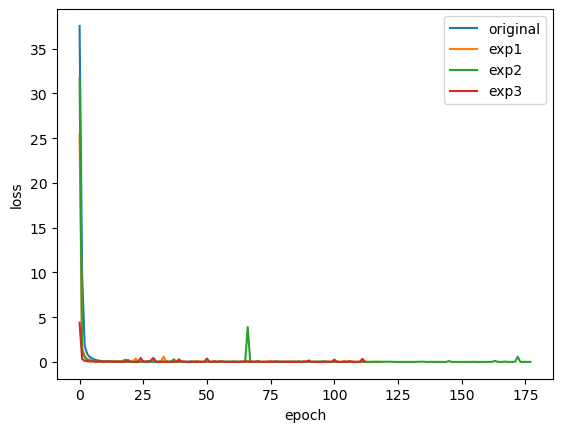

In [152]:
import matplotlib.pyplot as plt
df = pd.DataFrame([data.history['val_loss'],data2.history['val_loss'],data3.history['val_loss'],data4.history['val_loss']]).T
df.columns=["original","exp1","exp2","exp3"]
df.plot()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

回歸預測類別

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# df.columns = ['TimeElapsed','time','territoryName','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes',
#               'blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes',
#               'pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters',
#               'Party','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates']
df_class = pd.read_csv("ElectionData.csv",
                             #names=columns,
                             sep=r'\s*,\s*',
                             na_values="?",
                             engine='python',
                             header=0) # header=0表示資料本身已包含header，不用再多一列顯示
                                       # header=None表示資料本身並沒有包含header，需自行加入columns(如上面)
# 轉日期時間格式
df_class['"time"'] = pd.to_datetime(df_class['"time"'])
print(df_class['"time"'])
df_class = df_class.drop(columns=['"TimeElapsed"'])
df_class = df_class.drop(columns=['"time"'])

df_class.head()

0       2019-10-06 20:10:02
1       2019-10-06 20:10:02
2       2019-10-06 20:10:02
3       2019-10-06 20:10:02
4       2019-10-06 20:10:02
                ...        
21638   2019-10-07 00:35:01
21639   2019-10-07 00:35:01
21640   2019-10-07 00:35:01
21641   2019-10-07 00:35:01
21642   2019-10-07 00:35:01
Name: "time", Length: 21643, dtype: datetime64[ns]


"territoryName"  "totalMandates"  "availableMandates"  "numParishes"  \
0  "Território Nacional"                0                  226           3092   
1  "Território Nacional"                0                  226           3092   
2  "Território Nacional"                0                  226           3092   
3  "Território Nacional"                0                  226           3092   
4  "Território Nacional"                0                  226           3092   

   "numParishesApproved"  "blankVotes"  "blankVotesPercentage"  "nullVotes"  \
0                   1081          9652                     2.5         8874   
1                   1081          9652                     2.5         8874   
2                   1081          9652                     2.5         8874   
3                   1081          9652                     2.5         8874   
4                   1081          9652                     2.5         8874   

   "nullVotesPercentage"  "votersPercentage"  ...  "pre.votersPercentage"  \
0                    2.3               51.36  ...                   52.66   
1                    2.3               51.36  ...                   52.66   
2                    2.3               51.36  ...                   52.66   
3                    2.3               51.36  ...                   52.66   
4                    2.3               51.36  ...                   52.66   

   "pre.subscribedVoters"  "pre.totalVoters"    "Party"  "Mandates"  \
0                  813743             428546       "PS"           0   
1                  813743             428546  "PPD/PSD"           0   
2                  813743             428546     "B.E."           0   
3                  813743             428546   "CDS-PP"           0   
4                  813743             428546  "PCP-PEV"           0   

   "Percentage"  "validVotesPercentage"  "Votes"  "Hondt" "FinalMandates"  
0         38.29                   40.22   147993       94             106  
1         33.28                   34.95   128624       81              77  
2          6.81                    7.15    26307       16              19  
3          4.90                    5.14    18923       12               5  
4          4.59                    4.83    17757       11              12  

[5 rows x 26 columns]

In [154]:
# onehotencoder = OneHotEncoder()


dims=pd.get_dummies(df_class['"territoryName"'])
df_class=df_class.drop(columns=['"territoryName"'],axis=1)

res = pd.concat([dims,df_class], axis=1)
X = res.drop(columns=['"Party"'])
X

"Aveiro"  "Açores"  "Beja"  "Braga"  "Bragança"  "Castelo Branco"  \
0             0         0       0        0           0                 0   
1             0         0       0        0           0                 0   
2             0         0       0        0           0                 0   
3             0         0       0        0           0                 0   
4             0         0       0        0           0                 0   
...         ...       ...     ...      ...         ...               ...   
21638         0         0       0        0           0                 0   
21639         0         0       0        0           0                 0   
21640         0         0       0        0           0                 0   
21641         0         0       0        0           0                 0   
21642         0         0       0        0           0                 0   

       "Coimbra"  "Faro"  "Guarda"  "Leiria"  ...  "pre.nullVotesPercentage"  \
0              0       0         0         0  ...                       1.91   
1              0       0         0         0  ...                       1.91   
2              0       0         0         0  ...                       1.91   
3              0       0         0         0  ...                       1.91   
4              0       0         0         0  ...                       1.91   
...          ...     ...       ...       ...  ...                        ...   
21638          0       0         0         0  ...                       1.90   
21639          0       0         0         0  ...                       1.90   
21640          0       0         0         0  ...                       1.90   
21641          0       0         0         0  ...                       1.90   
21642          0       0         0         0  ...                       1.90   

       "pre.votersPercentage"  "pre.subscribedVoters"  "pre.totalVoters"  \
0                       52.66                  813743             428546   
1                       52.66                  813743             428546   
2                       52.66                  813743             428546   
3                       52.66                  813743             428546   
4                       52.66                  813743             428546   
...                       ...                     ...                ...   
21638                   51.28                  371931             190712   
21639                   51.28                  371931             190712   
21640                   51.28                  371931             190712   
21641                   51.28                  371931             190712   
21642                   51.28                  371931             190712   

       "Mandates"  "Percentage"  "validVotesPercentage"  "Votes"  "Hondt"  \
0               0         38.29                   40.22   147993       94   
1               0         33.28                   34.95   128624       81   
2               0          6.81                    7.15    26307       16   
3               0          4.90                    5.14    18923       12   
4               0          4.59                    4.83    17757       11   
...           ...           ...                     ...      ...      ...   
21638           0          0.19                    0.20      332        0   
21639           0          0.18                    0.19      326        0   
21640           0          0.14                    0.15      256        0   
21641           0          0.13                    0.14      239        0   
21642           0          0.07                    0.07      118        0   

       "FinalMandates"  
0                  106  
1                   77  
2                   19  
3                    5  
4                   12  
...                ...  
21638                0  
21639                0  
21640                0  
21641                0  
21642               

In [155]:
from sklearn.preprocessing import MinMaxScaler
#建立MinMaxScaler物件
columns = ['"availableMandates"','"numParishes"','"numParishesApproved"','"blankVotes"',
    '"blankVotesPercentage"','"nullVotes"','"nullVotesPercentage"','"votersPercentage"','"subscribedVoters"',
    '"totalVoters"','"pre.blankVotes"','"pre.blankVotesPercentage"','"pre.nullVotes"','"pre.nullVotesPercentage"',
    '"pre.votersPercentage"','"pre.subscribedVoters"','"pre.totalVoters"','"Mandates"','"Percentage"','"validVotesPercentage"',
    '"Votes"','"Hondt"','"FinalMandates"']
minmax = MinMaxScaler()

X[columns] = minmax.fit_transform(X[columns])
X.head()

"Aveiro"  "Açores"  "Beja"  "Braga"  "Bragança"  "Castelo Branco"  \
0         0         0       0        0           0                 0   
1         0         0       0        0           0                 0   
2         0         0       0        0           0                 0   
3         0         0       0        0           0                 0   
4         0         0       0        0           0                 0   

   "Coimbra"  "Faro"  "Guarda"  "Leiria"  ...  "pre.nullVotesPercentage"  \
0          0       0         0         0  ...                   0.388889   
1          0       0         0         0  ...                   0.388889   
2          0       0         0         0  ...                   0.388889   
3          0       0         0         0  ...                   0.388889   
4          0       0         0         0  ...                   0.388889   

   "pre.votersPercentage"  "pre.subscribedVoters"  "pre.totalVoters"  \
0                0.543068                0.085586           0.079098   
1                0.543068                0.085586           0.079098   
2                0.543068                0.085586           0.079098   
3                0.543068                0.085586           0.079098   
4                0.543068                0.085586           0.079098   

   "Mandates"  "Percentage"  "validVotesPercentage"   "Votes"   "Hondt"  \
0         0.0      0.779589                0.782101  0.079293  1.000000   
1         0.0      0.677531                0.679572  0.068915  0.861702   
2         0.0      0.138317                0.138716  0.014094  0.170213   
3         0.0      0.099409                0.099611  0.010138  0.127660   
4         0.0      0.093094                0.093580  0.009513  0.117021   

   "FinalMandates"  
0         1.000000  
1         0.726415  
2         0.179245  
3         0.047170  
4         0.113208  

[5 rows x 45 columns]

In [156]:
y = df_class['"Party"']
y.unique()

array(['"PS"', '"PPD/PSD"', '"B.E."', '"CDS-PP"', '"PCP-PEV"', '"PAN"',
       '"CH"', '"R.I.R."', '"PCTP/MRPP"', '"A"', '"L"', '"IL"', '"JPP"',
       '"NC"', '"PDR"', '"PNR"', '"PURP"', '"PPM"', '"MPT"', '"PTP"',
       '"MAS"'], dtype=object)

In [157]:
# onehotencoder = OneHotEncoder()


dims_class=pd.get_dummies(df_class['"Party"'])
dims_class

"A"  "B.E."  "CDS-PP"  "CH"  "IL"  "JPP"  "L"  "MAS"  "MPT"  "NC"  ...  \
0        0       0         0     0     0      0    0      0      0     0  ...   
1        0       0         0     0     0      0    0      0      0     0  ...   
2        0       1         0     0     0      0    0      0      0     0  ...   
3        0       0         1     0     0      0    0      0      0     0  ...   
4        0       0         0     0     0      0    0      0      0     0  ...   
...    ...     ...       ...   ...   ...    ...  ...    ...    ...   ...  ...   
21638    0       0         0     0     0      0    0      0      0     1  ...   
21639    0       0         0     0     0      0    0      0      0     0  ...   
21640    0       0         0     0     0      0    0      0      1     0  ...   
21641    0       0         0     0     0      0    0      0      0     0  ...   
21642    0       0         0     0     0      1    0      0      0     0  ...   

       "PCP-PEV"  "PCTP/MRPP"  "PDR"  "PNR"  "PPD/PSD"  "PPM"  "PS"  "PTP"  \
0              0            0      0      0          0      0     1      0   
1              0            0      0      0          1      0     0      0   
2              0            0      0      0          0      0     0      0   
3              0            0      0      0          0      0     0      0   
4              1            0      0      0          0      0     0      0   
...          ...          ...    ...    ...        ...    ...   ...    ...   
21638          0            0      0      0          0      0     0      0   
21639          0            0      0      1          0      0     0      0   
21640          0            0      0      0          0      0     0      0   
21641          0            0      0      0          0      0     0      1   
21642          0            0      0      0          0      0     0      0   

       "PURP"  "R.I.R."  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
...       ...       ...  
21638       0         0  
21639       0         0  
21640       0         0  
21641       0         0  
21642       0         0  

[21643 rows x 21 columns]

In [158]:
from sklearn.model_selection import train_test_split

# 切測試集&訓練集
X_train, X_test, y_train, y_test = train_test_split(X, dims_class, test_size=0.3, random_state=0)
# 切驗證集
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [159]:
print(len(X))
print(len(X_train))
print(len(X_test))
print(len(X_val))

21643
15150
3246
3247


In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 構建 FNN 模型
model = Sequential()
model.add(Dense(64, input_dim=45, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(21,activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights_class.h5', save_best_only=True, save_weights_only=True)


In [165]:
# 訓練模型
data3_class = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience
print('Best epoch:', best_epoch)
print('Validation loss at best epoch:', early_stopping.best)

Epoch 1/250
119/119 [==============================] - 2s 6ms/step - loss: 2.9367 - accuracy: 0.0988 - val_loss: 2.6539 - val_accuracy: 0.1512
Epoch 2/250
119/119 [==============================] - 1s 5ms/step - loss: 2.5168 - accuracy: 0.1896 - val_loss: 2.3715 - val_accuracy: 0.2214
Epoch 3/250
119/119 [==============================] - 0s 4ms/step - loss: 2.2680 - accuracy: 0.2371 - val_loss: 2.1835 - val_accuracy: 0.2448
Epoch 4/250
119/119 [==============================] - 0s 4ms/step - loss: 2.1366 - accuracy: 0.2661 - val_loss: 2.0608 - val_accuracy: 0.2769
Epoch 5/250
119/119 [==============================] - 0s 4ms/step - loss: 2.0407 - accuracy: 0.2845 - val_loss: 2.0068 - val_accuracy: 0.2504
Epoch 6/250
119/119 [==============================] - 0s 4ms/step - loss: 1.9589 - accuracy: 0.2974 - val_loss: 2.0088 - val_accuracy: 0.2670
Epoch 7/250
119/119 [==============================] - 0s 4ms/step - loss: 1.8921 - accuracy: 0.3122 - val_loss: 1.8883 - val_accuracy: 0.3228

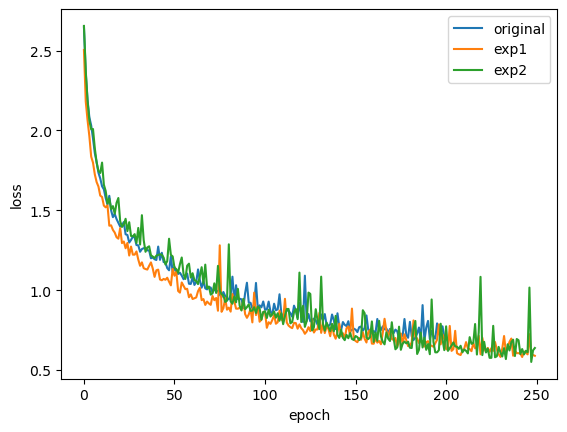

In [168]:
import matplotlib.pyplot as plt
df = pd.DataFrame([data_class.history['val_loss'],data2_class.history['val_loss'],data3_class.history['val_loss']]).T
df.columns=["original","exp1","exp2"]
df.plot()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

二維轉一維

In [128]:
y_test_pred = model.predict(X_test)
arg_y_test_pred=[]
for i in y_test_pred:
    arg_y_test_pred.append(np.argmax(i))
    # arg_y_test_pred.columns[np.argmax(i)]

arg_y_test=[]
for i in y_test_pred:
    arg_y_test.append(np.argmax(i))  


102/102 [==============================] - 0s 2ms/step


In [130]:
y_train_pred = model.predict(X_test)
arg_y_train_pred=[]
for i in y_train_pred:
    arg_y_train_pred.append(np.argmax(i))
    # arg_y_test_pred.columns[np.argmax(i)]

arg_y_train=[]
for i in y_train_pred:
    arg_y_train.append(np.argmax(i))  
   

102/102 [==============================] - 0s 2ms/step


In [132]:
y_val_pred = model.predict(X_test)
arg_y_val_pred=[]
for i in y_val_pred:
    arg_y_val_pred.append(np.argmax(i))
    # arg_y_test_pred.columns[np.argmax(i)]

arg_y_val=[]
for i in y_val_pred:
    arg_y_val.append(np.argmax(i))  

102/102 [==============================] - 0s 2ms/step


In [75]:
print(arg_y_test)
print(arg_y_test_pred)

[6, 8, 0, 20, 16, 19, 4, 1, 2, 13, 19, 18, 18, 16, 1, 19, 12, 15, 14, 1, 11, 12, 9, 15, 1, 9, 19, 0, 1, 20, 16, 0, 4, 10, 6, 3, 10, 12, 2, 15, 5, 13, 10, 15, 20, 11, 11, 18, 16, 15, 16, 11, 2, 12, 8, 3, 20, 14, 13, 12, 4, 15, 10, 8, 16, 11, 18, 1, 14, 2, 4, 18, 11, 14, 9, 10, 2, 16, 6, 8, 0, 5, 12, 11, 16, 17, 3, 4, 16, 8, 4, 2, 17, 9, 17, 20, 16, 8, 6, 1, 18, 0, 6, 3, 5, 19, 12, 13, 6, 8, 12, 3, 1, 17, 11, 3, 6, 17, 9, 12, 20, 14, 6, 3, 15, 17, 13, 0, 8, 3, 2, 8, 20, 16, 16, 15, 4, 12, 16, 14, 0, 6, 16, 15, 20, 0, 6, 9, 3, 10, 11, 17, 4, 8, 19, 3, 14, 4, 18, 0, 12, 8, 6, 8, 14, 3, 16, 19, 18, 14, 19, 2, 15, 10, 4, 10, 12, 17, 15, 11, 5, 11, 12, 16, 18, 0, 8, 3, 5, 19, 8, 6, 1, 9, 14, 16, 0, 0, 2, 19, 11, 20, 15, 0, 18, 12, 15, 19, 10, 5, 6, 10, 14, 16, 18, 16, 14, 3, 18, 5, 20, 3, 17, 9, 15, 3, 10, 2, 15, 9, 12, 1, 18, 11, 14, 9, 8, 9, 4, 1, 12, 12, 4, 15, 19, 15, 19, 18, 20, 7, 16, 1, 0, 16, 6, 16, 4, 6, 15, 10, 20, 4, 14, 16, 20, 6, 16, 2, 2, 12, 15, 1, 9, 14, 0, 19, 5, 14, 8, 10, 4

In [133]:
from sklearn.metrics import confusion_matrix,classification_report 

print(confusion_matrix(arg_y_val, arg_y_val_pred))
print(classification_report(arg_y_val, arg_y_val_pred,zero_division=1))
# print('Precision:', metrics.precision_score(arg_y_test, arg_y_test_pred))
# print('Recall:', metrics.recall_score(arg_y_test, arg_y_test_pred))
# print('F1:', metrics.f1_score(arg_y_test, arg_y_test_pred))


[[130   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 184   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0 173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0 132   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0  52   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0 190   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  27   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0  68   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0 188   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 166   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

In [91]:
arg_y_test[-10:-1]

[4, 1, 18, 20, 15, 0, 0, 2, 17]